In [9]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1'

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cuda


In [11]:
weight = 0.66

bias = 0.2

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [12]:
train_split  = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [13]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

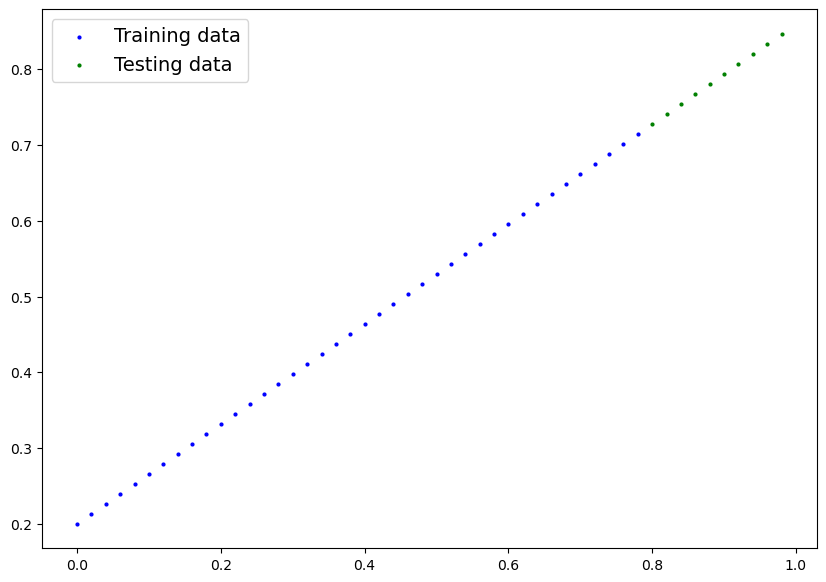

In [14]:
plot_predictions()

In [22]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, 
                            out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear(x)

torch.manual_seed(42)
model_1 = LinearRegression().to(device)
model_1, model_1.state_dict()

(LinearRegression(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear.bias', tensor([0.8300], device='cuda:0'))]))

In [23]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [24]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_1.parameters(), 
                            lr=0.01)

In [29]:
torch.manual_seed(42)

epochs = 200

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # Calculate predictions
    y_pred = model_1(X_train)

    # Calculate loss
    loss = loss_fn(y_pred, y_train)

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update the weights
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_predictions = model_1(X_test)

        test_loss = loss_fn(test_predictions, y_test)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Training loss: {loss}, Test loss: {test_loss}")



Epoch 0: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 10: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 20: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 30: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 40: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 50: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 60: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 70: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 80: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 90: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 100: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 110: Training loss: 0.00233986834064126, Test loss: 0.013911462388932705
Epoch 120: Training loss: 0.00233986834064126, Test loss: 0.013

In [30]:
model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.6544]], device='cuda:0')),
             ('linear.bias', tensor([0.2045], device='cuda:0'))])

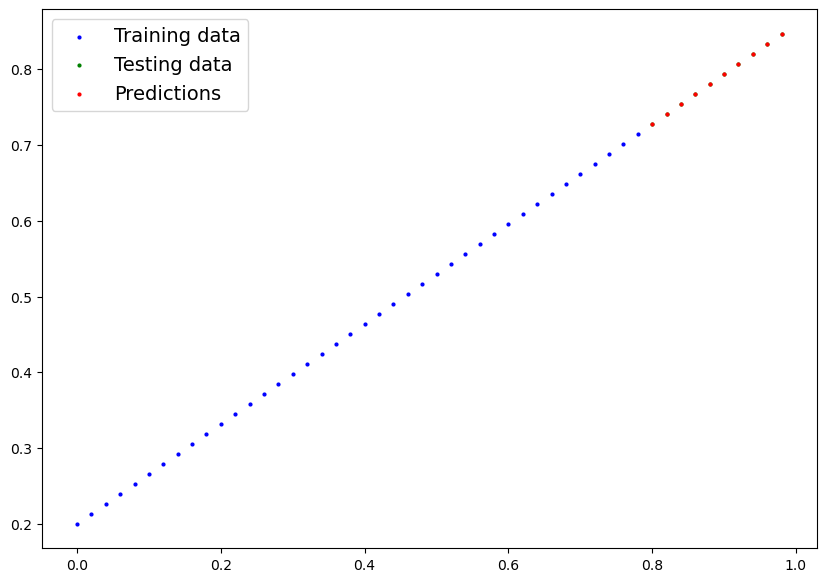

In [33]:
model_1.eval()

with torch.inference_mode():
    y_pred = model_1(X_test)

plot_predictions(predictions=y_pred.cpu())

In [36]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_copyalong_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

In [37]:
loaded_model = LinearRegression()

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model.to(device)

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [38]:
next(loaded_model.parameters()).device

device(type='cuda', index=0)

In [39]:
loaded_model.state_dict()

OrderedDict([('linear.weight', tensor([[0.6544]], device='cuda:0')),
             ('linear.bias', tensor([0.2045], device='cuda:0'))])

In [40]:
loaded_model.eval()

with torch.inference_mode():
    loaded_model_predictions = loaded_model(X_test)

y_pred == loaded_model_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')